In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
data = pd.read_csv("adult.csv")

In [2]:
#Tamaño del conjunto de datos
data.shape  #tenemos 32561 filas y 15 columnas

(32561, 15)

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Para los valores perdidos utilizaremos la moda para reemplazarlos
Realizamos un conteo de los atributo

In [4]:
data.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education.num     32561
marital.status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital.gain      32561
capital.loss      32561
hours.per.week    32561
native.country    32561
income            32561
dtype: int64

# Limpieza de datos inmcopletos
- Calculamos la moda
- El valor de la moda se reemplaza los valores faltantes

In [5]:
data_temp=data
#Reemplazamos en workclass
workclass_moda=data_temp["workclass"].mode()[0]
print("La moda del atributo workclass es: ", workclass_moda)
data_temp.loc[data_temp["workclass"]=="?","workclass"] = "Private"
#Reemplazamos en occupation
occupation_moda=data_temp["occupation"].mode()[0]
print("La moda del atributo occupation es: ", occupation_moda)
data_temp.loc[data_temp["occupation"]=="?","occupation"] = "Private"
#Reemplazamos en native.country
native_country_moda=data_temp["native.country"].mode()[0]
print("La moda del atributo native.country es: ", native_country_moda)
data_temp.loc[data_temp["native.country"]=="?","native.country"] = "United-States"
data_temp.head()

La moda del atributo workclass es:  Private
La moda del atributo occupation es:  Prof-specialty
La moda del atributo native.country es:  United-States


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Private,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Private,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
data_temp.shape

(32561, 15)

In [8]:
data_limpia=data_temp

Se reduce la categoria en el atributo marital.status, para un mejor modelo se va agrupar en solteros y casados, Married y Never-Married

In [9]:
data["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], dtype=object)

In [10]:
data_limpia.loc[data_limpia["marital.status"]=="Widowed", "marital.status"]="Married"
data_limpia.loc[data_limpia["marital.status"]=="Divorced","marital.status"]="Married"
data_limpia.loc[data_limpia["marital.status"]=="Separated","marital.status"]="Married"
data_limpia.loc[data_limpia["marital.status"]=="Married-civ-spouse","marital.status"]="Married"
data_limpia.loc[data_limpia["marital.status"]=="Married-spouse-absent","marital.status"]="Married"
data_limpia.loc[data_limpia["marital.status"]=="Married-AF-spouse","marital.status"]="Married"
data_limpia.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Married,Private,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Married,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Married,Private,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Married,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Married,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
data_limpia["marital.status"].unique()

array(['Married', 'Never-married'], dtype=object)

# Exploracion de datos
### Analizamos la clase income

In [12]:
#Mostramos la clase income
data_limpia["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

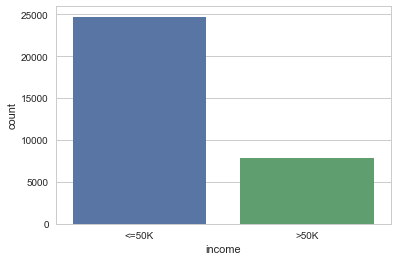

In [13]:
sns.countplot(x=data_limpia["income"] )
plt.show()

In [14]:
#Calculo de la media de income con los atributos numericos
data_limpia.groupby(data_limpia["income"]).mean()
#se observa que capital.gain y capital.loss tienen mucha diferencia, en menor medida la age(edad) y horas
#por semana (hours.per.week)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
income,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


Calculamos los atributos categoricos, respecto a los numericos, se puede realizar uno por uno

In [15]:
data_limpia.groupby("workclass").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
workclass,,,,,,
Federal-gov,42.590625,185221.243750,10.973958,833.232292,112.268750,41.379167
Local-gov,41.751075,188639.712852,11.042045,880.202580,109.854276,40.982800
Never-worked,20.571429,225989.571429,7.428571,0.000000,0.000000,28.428571
Private,37.109123,192446.206791,9.833361,868.081037,78.568156,39.642345
Self-emp-inc,46.017025,175981.344086,11.137097,4875.693548,155.138889,48.818100
Self-emp-not-inc,44.969697,175608.641480,10.226289,1886.061787,116.631641,44.421881
State-gov,39.436055,184136.613251,11.375963,701.699538,83.256549,39.031587
Without-pay,47.785714,174267.500000,9.071429,487.857143,0.000000,32.714286


In [16]:
data_limpia.groupby("education").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
education,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709


In [17]:
data_limpia.groupby("marital.status").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
marital.status,,,,,,
Married,43.674925,187041.480117,10.138404,1419.975820,104.373937,42.145260
Never-married,28.150988,195383.308996,9.962464,376.588318,52.345502,36.939998


In [18]:
data_limpia.groupby("occupation").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
occupation,,,,,,
Adm-clerical,36.964456,192043.396286,10.113528,495.954907,60.794430,37.558355
Armed-Forces,30.222222,215425.888889,10.111111,0.000000,209.666667,40.666667
Craft-repair,39.031471,192132.599658,9.110759,649.512808,88.465235,42.304221
Exec-managerial,42.169208,184414.012543,11.449090,2262.772996,138.838416,44.987703
Farming-fishing,41.211268,170190.176056,8.608652,589.726358,63.075453,46.989940
Handlers-cleaners,32.165693,204391.006569,8.510219,257.572993,45.635766,37.947445
Machine-op-inspct,37.715285,195040.877622,8.487512,328.689311,61.706294,40.755744
Other-service,34.949621,188608.452200,8.779666,191.301669,38.250683,34.701669
Priv-house-serv,41.724832,201107.523490,7.362416,279.852349,21.449664,32.885906


In [19]:
data_limpia.groupby("relationship").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
relationship,,,,,,
Husband,43.818616,187074.862503,10.326461,1795.062230,124.160919,44.120139
Not-in-family,38.346057,191131.795304,10.315593,743.327273,75.390728,40.595665
Other-relative,33.164118,205059.821611,8.786952,279.595311,51.332314,37.006116
Own-child,24.827940,193175.408840,9.486188,155.655485,39.511839,33.269337
Unmarried,40.293964,191128.405688,9.642194,455.031050,41.464887,39.103018
Wife,39.846301,181849.507653,10.463010,1659.791454,118.006378,36.861607


In [20]:
data_limpia.groupby("race").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
race,,,,,,
Amer-Indian-Eskimo,37.173633,120831.147910,9.311897,625.266881,34.176849,40.048232
Asian-Pac-Islander,37.746872,159940.609240,10.960539,1478.358037,97.222329,40.127045
Black,37.767926,228013.124200,9.486236,609.940461,60.385083,38.422855
Other,33.457565,197124.191882,8.841328,934.660517,61.070111,39.468635
White,38.769881,187298.064280,10.135246,1121.660375,90.806155,40.689100


In [21]:
data_limpia.groupby("sex").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
sex,,,,,,
Female,36.858230,185746.311206,10.035744,568.410547,61.187633,36.410361
Male,39.433547,191771.449013,10.102891,1329.370078,100.213309,42.428086


In [22]:
data_limpia.groupby("native.country").mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
native.country,,,,,,
Cambodia,37.789474,193080.368421,8.789474,1027.842105,183.052632,40.894737
Canada,42.545455,179852.933884,10.652893,1504.132231,129.933884,40.404959
China,42.533333,179047.986667,11.120000,366.480000,179.520000,37.786667
Columbia,39.711864,225149.406780,9.372881,180.610169,27.152542,39.067797
Cuba,45.768421,246291.347368,9.600000,367.231579,70.042105,39.157895
Dominican-Republic,37.728571,192089.557143,7.114286,1476.057143,25.171429,42.471429
Ecuador,36.642857,185858.821429,9.464286,527.607143,0.000000,39.571429
El-Salvador,34.132075,254392.971698,6.839623,574.320755,31.113208,36.792453
England,41.155556,182375.166667,11.011111,864.722222,82.755556,41.833333


In [23]:
#calculamos la autocorrelacion
data_limpia.corr()
#Sin considerar a income, solo los datos numericos
#Se observa que age, fnlwgt, education.num, capital.gain, capital.loss y hours.per.week tienen baja correlacion.

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


# Visualizaciones

Text(0,0.5,'Income')

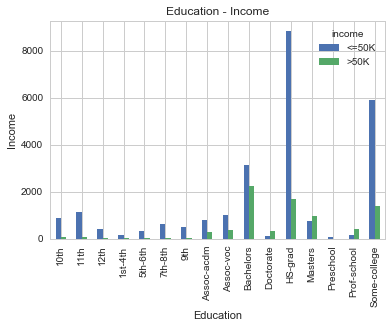

In [24]:
#Educacion vs income para ver cual afecta mas, al ser muy alta puede ser un buen predictor
pd.crosstab(data_limpia.education, data_limpia.income).plot(kind="bar")
plt.title("Education - Income")
plt.xlabel("Education")
plt.ylabel("Income")
                                                            

Text(0,0.5,'Income')

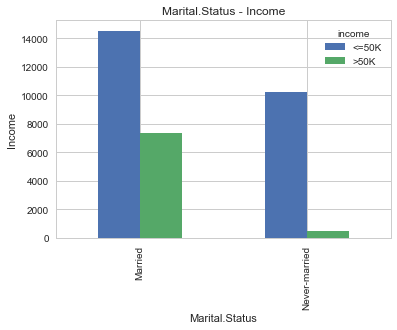

In [25]:
#Marital.statuts vs income para ver cual afecta mas
pd.crosstab(data_limpia["marital.status"] , data_limpia.income).plot(kind="bar")
plt.title("Marital.Status - Income")
plt.xlabel("Marital.Status")
plt.ylabel("Income")

Text(0,0.5,'Income')

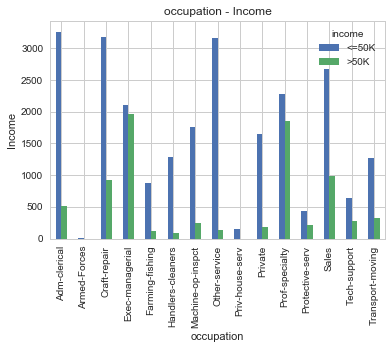

In [26]:
#Occupation vs income para ver cual afecta mas, al ser muy alta puede ser un buen predictor
pd.crosstab(data_limpia["occupation"] , data_limpia.income).plot(kind="bar")
plt.title("occupation - Income")
plt.xlabel("occupation")
plt.ylabel("Income")

Text(0,0.5,'Income')

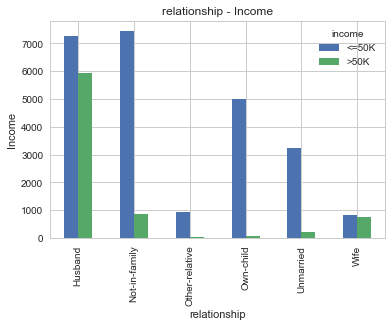

In [27]:
#relationship vs income para ver cual afecta mas, al ser muy alta puede ser un buen predictor
pd.crosstab(data_limpia["relationship"] , data_limpia.income).plot(kind="bar")
plt.title("relationship - Income")
plt.xlabel("relationship")
plt.ylabel("Income")

Text(0,0.5,'Income')

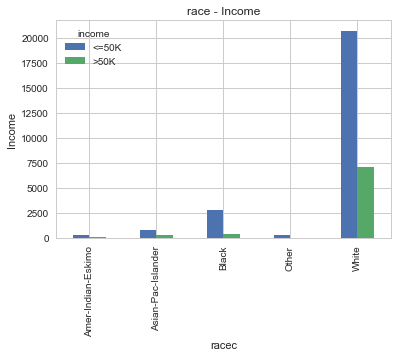

In [28]:
#race vs income para ver cual afecta mas
pd.crosstab(data_limpia["race"] , data_limpia.income).plot(kind="bar")
plt.title("race - Income")
plt.xlabel("racec")
plt.ylabel("Income")

Text(0,0.5,'Income')

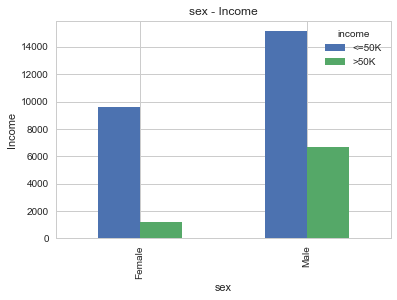

In [29]:
#sex vs income para ver cual afecta mas
pd.crosstab(data_limpia["sex"] , data_limpia.income).plot(kind="bar")
plt.title("sex - Income")
plt.xlabel("sex")
plt.ylabel("Income")

Text(0,0.5,'Income')

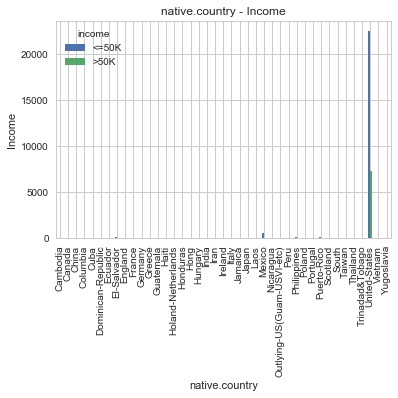

In [30]:
#Nativecountry vs income para ver cual afecta mas
pd.crosstab(data_limpia["native.country"] , data_limpia.income).plot(kind="bar")
plt.title("native.country - Income")
plt.xlabel("native.country")
plt.ylabel("Income")

## Nuevo dataset data_impia2 , sin las columnas duplicadas

In [31]:
#Creo un nueveo dataset, no utilizo education-num, relationship, cappital.gain,capital.loss
data_limpia2=data_limpia[["age", "workclass", "fnlwgt", "education", "marital.status", "occupation", "race", "sex", "hours.per.week","native.country", "income" ]]
data_limpia2.head()

,age,workclass,fnlwgt,education,marital.status,occupation,race,sex,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,Married,Private,White,Female,40,United-States,<=50K
1,82,Private,132870,HS-grad,Married,Exec-managerial,White,Female,18,United-States,<=50K
2,66,Private,186061,Some-college,Married,Private,Black,Female,40,United-States,<=50K
3,54,Private,140359,7th-8th,Married,Machine-op-inspct,White,Female,40,United-States,<=50K
4,41,Private,264663,Some-college,Married,Prof-specialty,White,Female,40,United-States,<=50K


# Aplico Dummies
## Las variables categoricas las convierto en zeros y unos

In [32]:
data_dummy=pd.get_dummies(data_limpia2)
data_dummy.head()

,age,fnlwgt,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
0,90,77053,40,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,82,132870,18,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,66,186061,40,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,54,140359,40,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,41,264663,40,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
